In [1]:
# Columns

# Unfinished : 1 = product not finished __________________ 0 = product finished 
# Finished : 0 = product not finished __________________ 1 = product finished 

In [2]:
# Libraries

#_________DATA MANIPULATION_____________#

import pandas as pd
import numpy as np

#________DATA VISUALIZATION_____________#

import seaborn as sns
import matplotlib.pyplot as plt

#________ML - LIBRARIES_________________#

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading CSV

data = pd.read_csv('projects.csv')

In [4]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
# Creating a column called 'finished' and swapping the value in the column 'unfinished' to put the data in the 'finished' column

swap_values = {   
    0 : 1,
    1 : 0
}

data['finished'] = data['unfinished'].map(swap_values) # The map apply'swap_values' in the column data['unfinished']

In [6]:
# New data

data

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

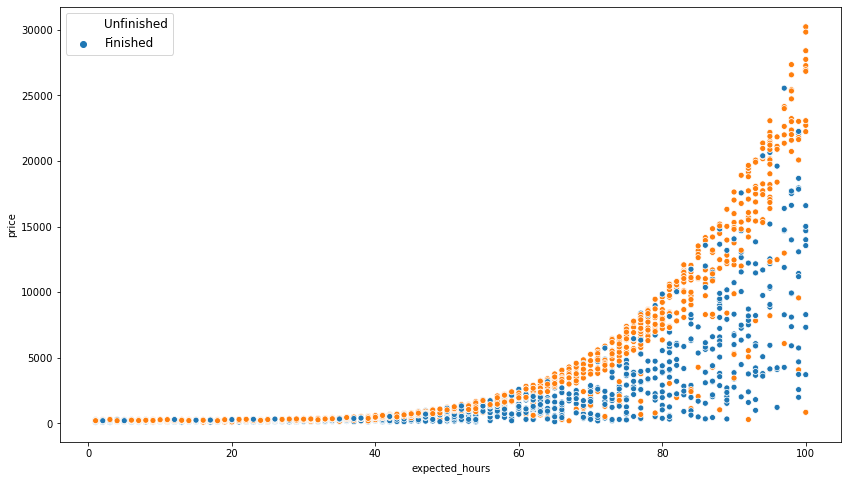

In [7]:
# Creating a scatterplot to understand the data and the relations between the columns 'expected_hours' and 'price'

ax = sns.scatterplot(data=data, 
                     x ='expected_hours', 
                     y = 'price',
                     hue = 'finished')


ax.figure.set_size_inches(14, 8) 

# Subtitle configs
handles,_= ax.get_legend_handles_labels()
ax.legend(handles, ['Unfinished', 'Finished'], fontsize=12)

ax

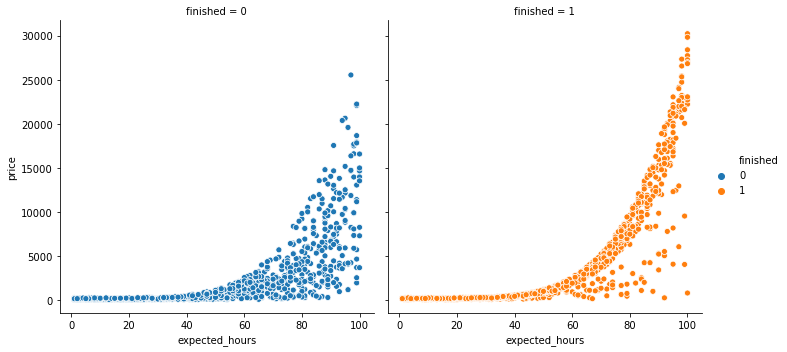

In [8]:
# Analyzing in 2 different plots

ax = sns.relplot(data=data, 
                     x ='expected_hours', 
                     y = 'price',
                     hue = 'finished',
                     col = 'finished')

In [9]:
# Separating the columns in features and labels 

x = data[['expected_hours', 'price']] # features
y = data['finished'] # labels

In [10]:
# Defining the random state
seed = 5
np.random.seed(seed)

# Train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25)
print(f'Training with {len(x_train)} elements and testing with {len(x_test)} elements')

# Linear SVC model
model = LinearSVC(dual = False) # Using dual cause n_samples > n_features.
model.fit(x_train, y_train) 
predict = model.predict(x_test) 

# Accuracy
accuracy = accuracy_score(y_test, predict) * 100
print(f'The accuracy is {accuracy : .2f} %')

Training with 1617 elements and testing with 540 elements
The accuracy is  55.93 %


In [11]:
# Shotting number

random_predicts = np.ones(540)
accuracy_rp = accuracy_score(y_test, random_predicts) * 100
print(f'The baseline accuracy is {accuracy_rp : .2f} %')

The baseline accuracy is  52.59 %


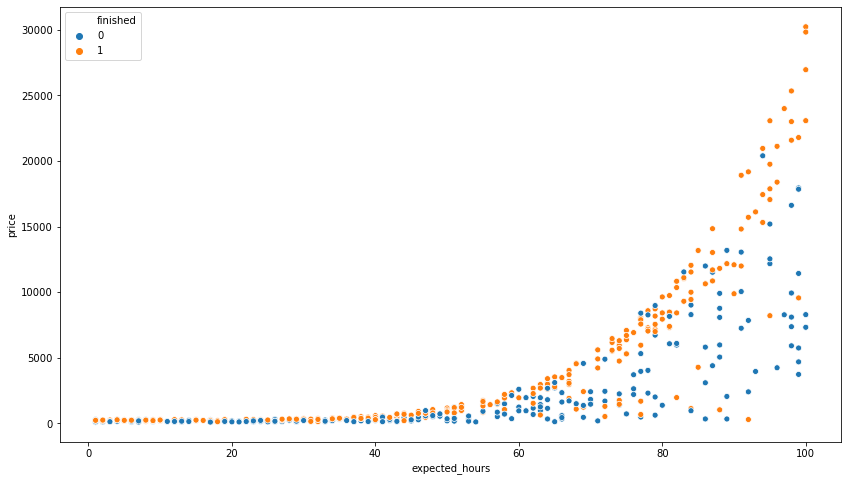

In [12]:
# Scatterplot analyzing x_test with the y_test hue

ax = sns.scatterplot(data= x_test, 
                     x ='expected_hours', 
                     y = 'price',
                     hue = y_test)

ax.figure.set_size_inches(14, 8) 

In [13]:
# Objective: Paint all the plot pixel by pixel and implement the decision curve to identify the decision boundary

# Decision Boundary

x_min = x_test['expected_hours'].min()
x_max = x_test['expected_hours'].max()

y_min = x_test['price'].min()
y_max = x_test['price'].max()

In [14]:
pixel = 100
#spacing between each pixel
spacing = (x_max - x_min) / pixel # 0.99

In [15]:
# Eixo X
x_axis = np.arange(x_min, x_max, spacing)
x_axis

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [16]:
# Eixo Y
y_axis = np.arange(y_min, y_max, spacing)
y_axis

array([  100.  ,   100.99,   101.98, ..., 30220.75, 30221.74, 30222.73])

In [17]:
# Multiple axis to create a grid

xx, yy = np.meshgrid(x_axis, y_axis) # each axis 100 times, for example xx axis 100 times and yy too 
dots = np.c_[xx.ravel(), yy.ravel()] # ravel() put all values in a array and np.c_ concatenate all x and y 
dots

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 3.022273e+04],
       [9.802000e+01, 3.022273e+04],
       [9.901000e+01, 3.022273e+04]])

In [18]:
z = model.predict(dots)
z = z.reshape(xx.shape) # 1000 to 100x100
z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

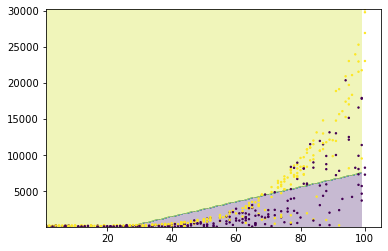

In [19]:
# Decision Boundary

plt.contourf(xx, yy, z, alpha=0.3)

plt.scatter(x_test['expected_hours'], x_test['price'], 
            c = y_test, s =2)  

# SVM ( Suport Vector Machines)

In [36]:
seed = 5
np.random.seed(seed)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.25)
print(f'Training with {len(x_train)} elements and testing with {len(x_test)} elements')

model = SVC() 
model.fit(x_train, y_train) 
predict = model.predict(x_test) 

accuracy = accuracy_score(y_test, predict) * 100
print(f'The accuracy is {accuracy : .2f} %')

Training with 1617 elements and testing with 540 elements
The accuracy is  55.19 %


In [21]:
x_min = x_test['expected_hours'].min()
x_max = x_test['expected_hours'].max()

y_min = x_test['price'].min()
y_max = x_test['price'].max()

In [22]:
# Espaçamento
spacing = (x_max - x_min) / pixel # 0.99

# Eixo X
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixel)

# Eixo Y
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixel)

In [23]:
# Multiple axis to create a grid

xx, yy = np.meshgrid(x_axis, y_axis) # each axis 100 times
dots = np.c_[xx.ravel(), yy.ravel()] # ravel() put all values in a array and np.c_ concatenate all x and y
dots

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [24]:
z = model.predict(dots)
z = z.reshape(xx.shape) # 1000 to 100x100
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

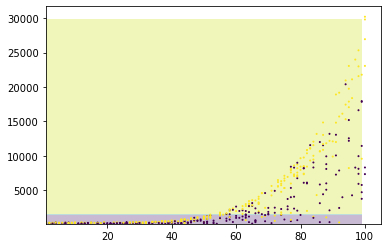

In [25]:
# Decision Boundary
plt.contourf(xx, yy, z, alpha=0.3)

plt.scatter(x_test['expected_hours'], x_test['price'], 
            c = y_test, s = 1)  

# Using Standard Scale

In [26]:
# Algorithms are susceptible to scale

In [37]:
SEED = 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'Training with {len(raw_x_train)} elements and testing with {len(raw_x_test)} elements')

# Standard Scaler
# Obs: Changing the scales (x and y ------- (x ---> (0,100) and y ---> (0,30000))

scaler = StandardScaler()
scaler.fit(raw_x_train)                  # Train using x_train
x_train = scaler.transform(raw_x_train)  # transform in a new x_train with the new scale
x_test = scaler.transform(raw_x_test)    # transform in a new x_test with the new scale

model = SVC()
model.fit(x_train, y_train)
predict_ss = model.predict(x_test)

accuracy_ss = accuracy_score(y_test, predict_ss) * 100
print("The accuracy using Standard Scale is %.2f%%" % accuracy_ss)

Training with 1617 elements and testing with 540 elements
The accuracy using Standard Scale is 66.85%


In [28]:
raw_x_test

,expected_hours,price
562,36,264
85,100,7327
507,92,7852
1624,95,17058
822,45,281
...,...,...
102,82,1973
1012,73,6464
484,77,683
1079,62,2277


In [29]:
x_test # [expected_hours, price]

array([[-0.50574693, -0.56359741],
       [ 1.74180484,  0.84394228],
       [ 1.46086087,  0.94856614],
       ...,
       [ 0.93409092, -0.4800976 ],
       [ 0.40732098, -0.16243963],
       [-1.03251687, -0.59269281]])

In [30]:
x_data = x_test[ : ,0] # expected_hours - axis
y_data = x_test[ : ,1] # price - axis

In [31]:
x_min = x_data.min()
x_max = x_data.max()

y_min = y_data.min()
y_max = y_data.max()

In [32]:
# Espaçamento
spacing = (x_max - x_min) / pixel # 0.99

# Eixo X
x_axis = np.arange(x_min, x_max, spacing)

# Eixo Y
y_axis = np.arange(y_min, y_max, spacing)

In [33]:
# Multiple axis to create a grid

xx, yy = np.meshgrid(x_axis, y_axis) # each axis 100 times
dots = np.c_[xx.ravel(), yy.ravel()] # ravel() put all values in a array and np.c_ concatenate all x and y
dots

array([[-1.7348768 , -0.59627991],
       [-1.70010998, -0.59627991],
       [-1.66534316, -0.59627991],
       ...,
       [ 1.63750439,  5.38361249],
       [ 1.6722712 ,  5.38361249],
       [ 1.70703802,  5.38361249]])

In [34]:
z = model.predict(dots)
z = z.reshape(xx.shape) # 1000 to 100x100
z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

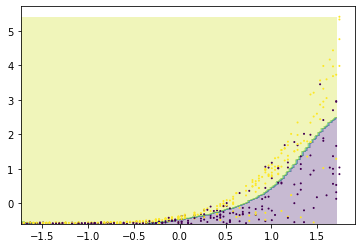

In [35]:
# Decision Boundary
plt.contourf(xx, yy, z, alpha=0.3)

plt.scatter(x_data, y_data, 
            c = y_test, s = 1)  